In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import ascii

In [3]:
data = Table.read("ASTR19_F25_group_project_data.txt", format="ascii")
print(data)

col1  col2  col3
---- ----- -----
   1  8:07  6.57
   1 15:37 -0.39
   2  8:55  5.38
   2 16:25 -1.74
   3  9:45  5.26
   3 17:14 -1.36
   4 10:35  4.13
   4 18:00 -1.15
   5 11:28  3.48
   5 18:46 -1.61
 ...   ...   ...
  37  2:13  4.13
  37 20:00  1.21
  38  2:54  3.34
  38  9:54  2.58
  39  3:39  3.32
  39 11:15  3.26
  40  4:29  5.21
  40 12:22  2.39
  41  5:21  4.83
  41 13:14  2.41
Length = 82 rows


In [13]:
#Formatted data
fdata = Table()
fdata['a'] = [1.53333333333333, 2.21666666666667, 2.36666666666667, 2.9, 2.96666666666667, 3.36666666666667, 3.61666666666667, 3.65, 4.11666666666667, 4.38333333333333, 4.48333333333333, 4.83333333333333, 5.25, 5.35, 5.51666666666667, 6.13333333333333, 6.15, 6.78333333333333, 7.08333333333333, 7.36666666666667, 7.96666666666667, 7.98333333333333, 8.11666666666667, 8.56666666666667, 8.83333333333333, 8.91666666666667, 9.16666666666667, 9.66666666666667, 9.75, 9.75, 9.9, 10.35, 10.5, 10.5833333333333, 10.7333333333333, 10.95, 11.25, 11.3166666666667, 11.4666666666667, 11.6333333333333, 11.9166666666667, 11.9666666666667, 12.1666666666667, 12.3666666666667, 12.3666666666667, 12.4166666666667, 12.9333333333333, 12.95, 13.2333333333333, 13.4, 13.75, 13.8333333333333, 14.4166666666667, 14.65, 15, 15.45, 15.5666666666667, 15.6166666666667, 16.1333333333333, 16.1666666666667, 16.4166666666667, 16.6833333333333, 16.8666666666667, 17.2, 17.2333333333333, 17.5666666666667, 17.75, 18, 18.2, 18.25, 18.7666666666667, 18.8, 18.8166666666667, 19.3333333333333, 19.4, 19.5166666666667, 19.8666666666667, 20, 20.2666666666667, 20.5, 21.0166666666667, 21.7666666666667]
fdata['b'] = [3.45, 4.13, 4.1, 3.34, 3.17, 3.57, 3.71, 3.32, 4.54, 4.04, 5.21, 3.76, 4.07, 4.83, 3.9, 4.73, 5.93, 5.66, 6.89, 5.33, 6.72, 5.23, 6.57, 6.67, 6.77, 5.38, 4.74, 5.77, 5.26, 4.69, 2.58, 4.2, 4.35, 4.13, 3.1, 3.68, 3.26, 4.23, 3.48, 2.47, 2.49, 2.88, 2.24, 2.62, 2.39, 2.59, 1.92, 2.18, 2.41, 1.83, 1.74, 0.7, 0.79, 0.21, -0.04, 0.22, -1.12, -0.39, -0.61, -1.68, -1.74, -0.93, -1.32, -1.29, -1.36, -0.73, 0.22, -1.15, -0.38, 0.26, -1.61, 0.36, -0.61, 0.99, -0.46, 0.05, 1.87, 1.21, 1.01, 1.6, 0.73, 2.17]

#I've converted the hours to integer values and ordered them in the first column
#The second column is the tide level corresponding to each of those values
#This will make for a graph that shows the tide rising and falling over the day

print(fdata)

       a           b  
---------------- -----
1.53333333333333  3.45
2.21666666666667  4.13
2.36666666666667   4.1
             2.9  3.34
2.96666666666667  3.17
3.36666666666667  3.57
3.61666666666667  3.71
            3.65  3.32
4.11666666666667  4.54
4.38333333333333  4.04
             ...   ...
18.8166666666667 -0.61
19.3333333333333  0.99
            19.4 -0.46
19.5166666666667  0.05
19.8666666666667  1.87
            20.0  1.21
20.2666666666667  1.01
            20.5   1.6
21.0166666666667  0.73
21.7666666666667  2.17
Length = 82 rows


Text(0, 0.5, 'Tide level (feet)')

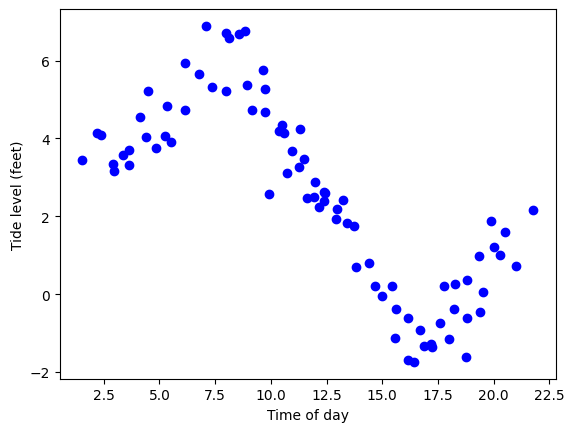

In [21]:
x = fdata['a']
y = fdata['b']

plt.plot(x, y, 'bo')

plt.xlabel('Time of day')
plt.ylabel('Tide level (feet)')

#I want the x tick labels to be in the hours:minutes format but as of uploading this that is not done

In [ ]:
#this looks like a sin function